# Molecular String Renderer - Basic Usage Tutorial

This notebook demonstrates the basic functionality of the molecular string renderer library, which allows you to convert molecular representations (SMILES, InChI, SELFIES, etc.) into high-quality images.

## Prerequisites:
- Python 3.10+
- Basic understanding of molecular representations (SMILES, InChI)

## 1. Installation and Setup

First, let's install the molecular string renderer package and import the necessary components.

In [1]:
# Install the package (run this once)
# !pip install molecular-string-renderer

# For development/local installation:
# !pip install -e .

In [2]:
# Import the main functions and classes
from molecular_string_renderer import (
    render_molecule,
    validate_molecular_string,
    get_supported_formats,
    RenderConfig,
    OutputConfig,
    MolecularRenderer
)

from IPython.display import Image, display
import logging

# Set up logging to see what's happening
logging.basicConfig(level=logging.INFO)

In [3]:
# Let's check what formats are supported
supported_formats = get_supported_formats()

print("Supported Input Formats:")
for fmt, desc in supported_formats["input_formats"].items():
    print(f"  • {fmt}: {desc}")

print("\nSupported Output Formats:")
for fmt, desc in supported_formats["output_formats"].items():
    print(f"  • {fmt}: {desc}")

Supported Input Formats:
  • smiles: Simplified Molecular Input Line Entry System
  • smi: SMILES (alternative extension)
  • inchi: International Chemical Identifier
  • mol: MOL file format
  • sdf: Structure Data File format
  • selfies: Self-Referencing Embedded Strings

Supported Output Formats:
  • png: Portable Network Graphics (recommended)
  • svg: Scalable Vector Graphics (true vector format)
  • jpg: JPEG image format
  • jpeg: JPEG image format (alternative extension)
  • pdf: Portable Document Format
  • webp: WebP image format (modern, efficient compression)
  • tiff: Tagged Image File Format (high quality, supports transparency)
  • tif: TIFF image format (alternative extension)
  • bmp: Bitmap image format (uncompressed)
  • gif: Graphics Interchange Format (limited color, not recommended)


## 2. Basic Usage Examples

Let's start with the most common use case: rendering molecules from SMILES strings.

### 2.1 Rendering from SMILES

In [4]:
# Simple example: render ethanol (CCO) to PNG
ethanol_image = render_molecule("CCO", format_type="smiles", output_format="png", auto_filename=False)

# The function returns a PIL Image object
print(f"Image type: {type(ethanol_image)}")
print(f"Image size: {ethanol_image.size}")
print(f"Image mode: {ethanol_image.mode}")

# Save the image to see it
ethanol_image.save("ethanol.png")
print("✓ Ethanol image saved as 'ethanol.png'")

INFO:molecular_string_renderer.core:Successfully rendered SMILES to PNG


Image type: <class 'PIL.Image.Image'>
Image size: (500, 500)
Image mode: RGBA
✓ Ethanol image saved as 'ethanol.png'


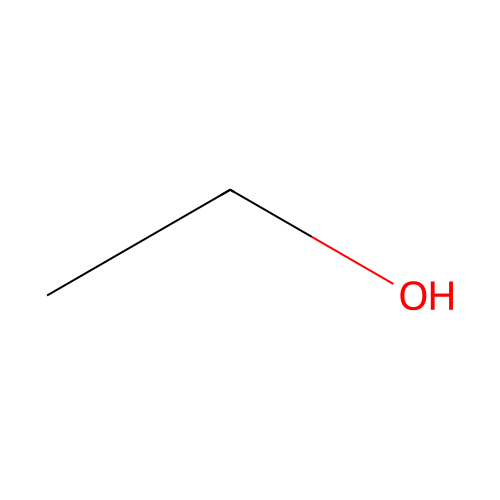

In [5]:
# Display the image in the notebook
display(Image("ethanol.png"))

In [6]:
# Let's try some more interesting molecules
molecules = {
    "Aspirin": "CC(=O)OC1=CC=CC=C1C(=O)O",
    "Caffeine": "CN1C=NC2=C1C(=O)N(C(=O)N2C)C", 
    "Benzene": "C1=CC=CC=C1",
    "Water": "O",
    "Ethanol": "CCO"
}
for name, smiles in molecules.items():
    image = render_molecule(smiles, output_path=f"{name.lower()}.png")

INFO:molecular_string_renderer.outputs.base:Successfully saved PNG to 'aspirin.png'
INFO:molecular_string_renderer.core:Successfully rendered SMILES to PNG
INFO:molecular_string_renderer.outputs.base:Successfully saved PNG to 'caffeine.png'
INFO:molecular_string_renderer.core:Successfully rendered SMILES to PNG
INFO:molecular_string_renderer.outputs.base:Successfully saved PNG to 'benzene.png'
INFO:molecular_string_renderer.core:Successfully rendered SMILES to PNG
INFO:molecular_string_renderer.outputs.base:Successfully saved PNG to 'water.png'
INFO:molecular_string_renderer.core:Successfully rendered SMILES to PNG
INFO:molecular_string_renderer.outputs.base:Successfully saved PNG to 'ethanol.png'
INFO:molecular_string_renderer.core:Successfully rendered SMILES to PNG



Aspirin:


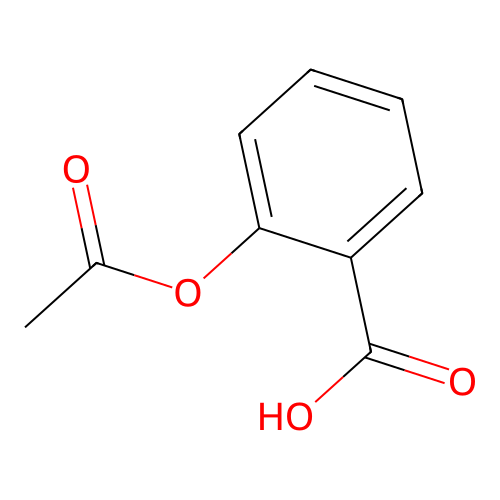


Caffeine:


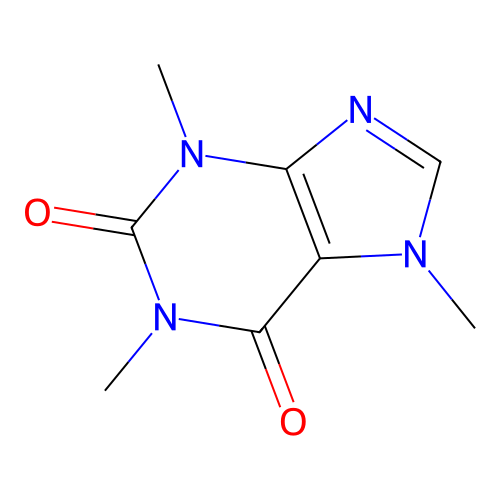


Benzene:


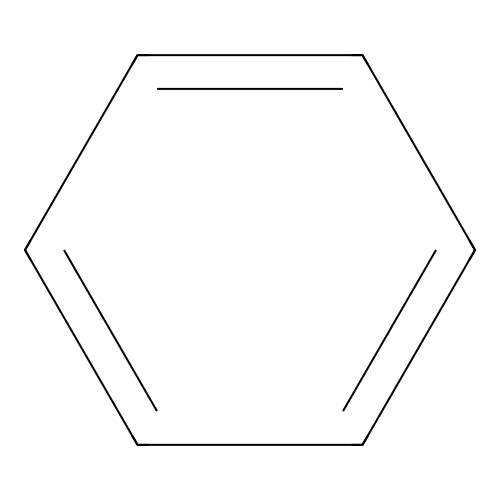


Water:


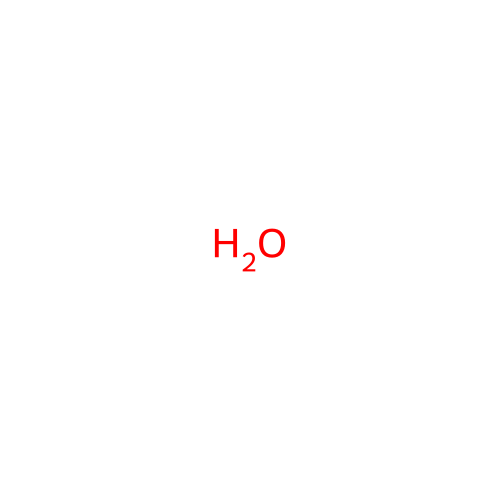


Ethanol:


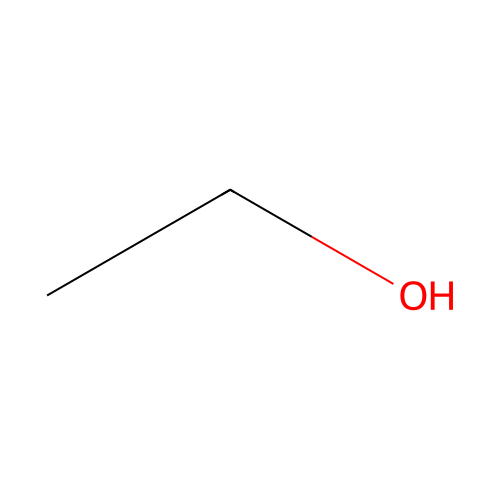

In [7]:
# Display them all in a grid
for name in molecules.keys():
    filename = f"{name.lower()}.png"
    print(f"\n{name}:")
    display(Image(filename))

### 2.2 Different Input Formats

INFO:molecular_string_renderer.outputs.base:Successfully saved PNG to 'ethanol_from_inchi.png'
INFO:molecular_string_renderer.core:Successfully rendered INCHI to PNG


✓ Ethanol rendered from InChI


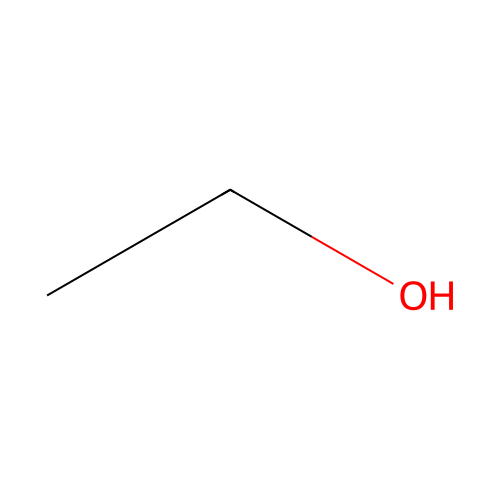

In [8]:
# Example with InChI format (ethanol)
inchi_ethanol = "InChI=1S/C2H6O/c1-2-3/h3H,2H2,1H3"
ethanol_from_inchi = render_molecule(
    inchi_ethanol, 
    format_type="inchi", 
    output_path="ethanol_from_inchi.png"
)
print("✓ Ethanol rendered from InChI")
display(Image("ethanol_from_inchi.png"))

INFO:molecular_string_renderer.outputs.base:Successfully saved PNG to 'ethanol_from_selfies.png'
INFO:molecular_string_renderer.core:Successfully rendered SELFIES to PNG


✓ Ethanol rendered from SELFIES


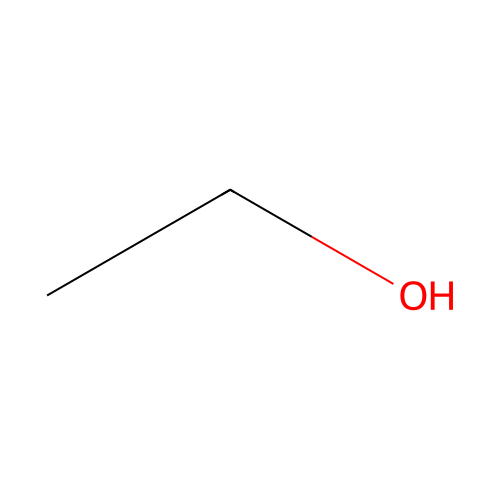

In [9]:
# Example with SELFIES format (ethanol)
selfies_ethanol = "[C][C][O]"
ethanol_from_selfies = render_molecule(
    selfies_ethanol,
    format_type="selfies",
    output_path="ethanol_from_selfies.png"
)
print("✓ Ethanol rendered from SELFIES")
display(Image("ethanol_from_selfies.png"))

### 2.3 Different Output Formats

Rendering aspirin in different formats...


INFO:molecular_string_renderer.outputs.base:Successfully saved PNG to 'aspirin.png'
INFO:molecular_string_renderer.core:Successfully rendered SMILES to PNG


  ✓ Saved as aspirin.png (size: (500, 500))
    Displaying PNG:


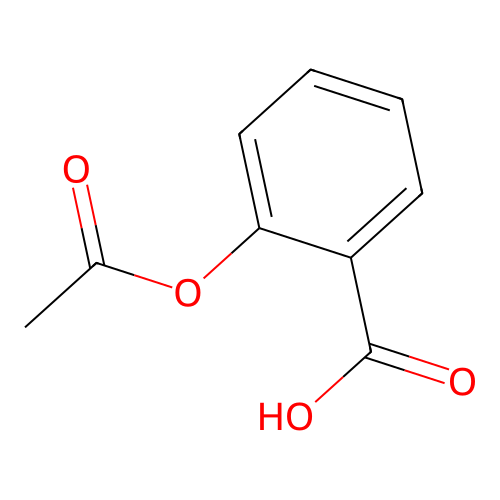

INFO:molecular_string_renderer.outputs.base:Successfully saved svg to 'aspirin.svg'
INFO:molecular_string_renderer.core:Successfully rendered SMILES to SVG
INFO:molecular_string_renderer.outputs.base:Successfully saved JPEG to 'aspirin.jpg'
INFO:molecular_string_renderer.core:Successfully rendered SMILES to JPG


  ✓ Saved as aspirin.svg (size: (500, 500))
  ✓ Saved as aspirin.jpg (size: (500, 500))
    Displaying JPG:


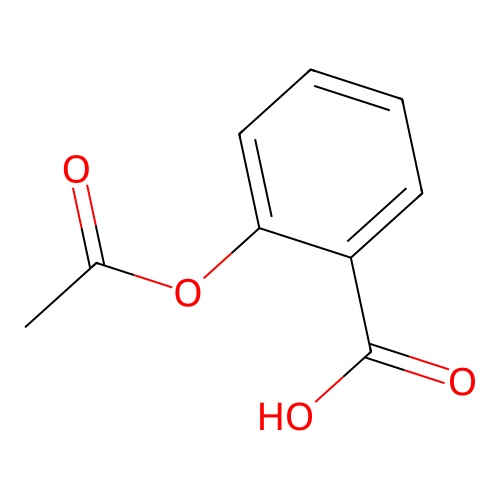

INFO:molecular_string_renderer.outputs.base:Successfully saved WEBP to 'aspirin.webp'
INFO:molecular_string_renderer.core:Successfully rendered SMILES to WEBP


  ✓ Saved as aspirin.webp (size: (500, 500))


In [10]:
# Try different output formats for the same molecule (aspirin)
aspirin_smiles = "CC(=O)OC1=CC=CC=C1C(=O)O"
formats_to_try = ["png", "svg", "jpg", "webp"]

print("Rendering aspirin in different formats...")
for fmt in formats_to_try:
    filename = f"aspirin.{fmt}"
    image = render_molecule(
        aspirin_smiles,
        output_format=fmt,
        output_path=filename
    )
    print(f"  ✓ Saved as {filename} (size: {image.size})")
    
    # Display PNG and JPG in notebook (SVG and WebP can also be displayed)
    if fmt in ["png", "jpg"]:
        print(f"    Displaying {fmt.upper()}:")
        display(Image(filename))

## 3. Configuration Options

Let's explore how to customize the appearance of your molecular renderings.

### 3.1 Render Configuration

INFO:molecular_string_renderer.outputs.base:Successfully saved PNG to 'ethanol_custom.png'
INFO:molecular_string_renderer.core:Successfully rendered SMILES to PNG


Custom ethanol image size: (800, 600)


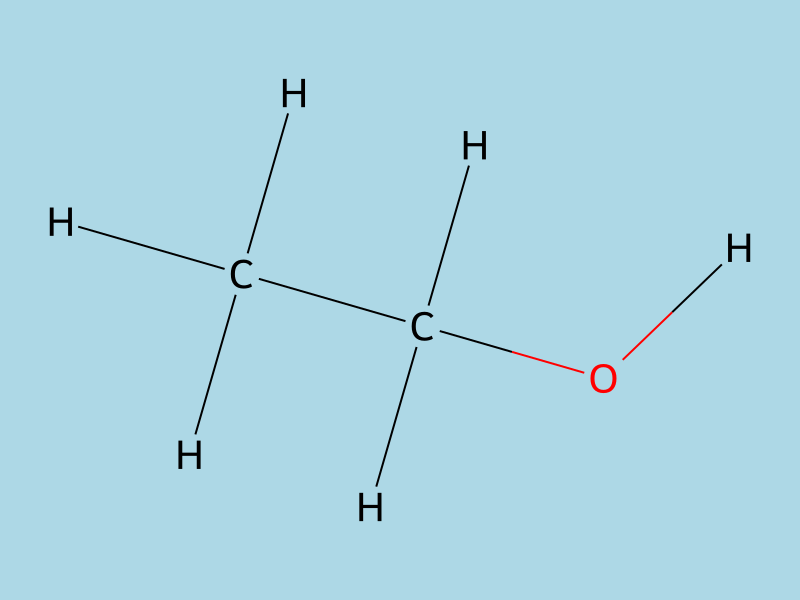

In [11]:
# Create a custom render configuration
custom_config = RenderConfig(
    width=800,                    # Larger image
    height=600,                   # Different aspect ratio
    background_color="lightblue", # Custom background
    show_hydrogen=True,           # Show hydrogens
    show_carbon=True             # Show carbon labels
)

# Use the configuration
big_ethanol = render_molecule(
    "CCO",
    render_config=custom_config,
    output_path="ethanol_custom.png"
)

print(f"Custom ethanol image size: {big_ethanol.size}")
display(Image("ethanol_custom.png"))

### 3.2 Output Configuration

INFO:molecular_string_renderer.outputs.base:Successfully saved PNG to 'caffeine_hq.png'
INFO:molecular_string_renderer.core:Successfully rendered SMILES to PNG


✓ High-quality caffeine rendered
Normal quality: 20,184 bytes
High quality: 20,376 bytes
Size increase: 1.0%


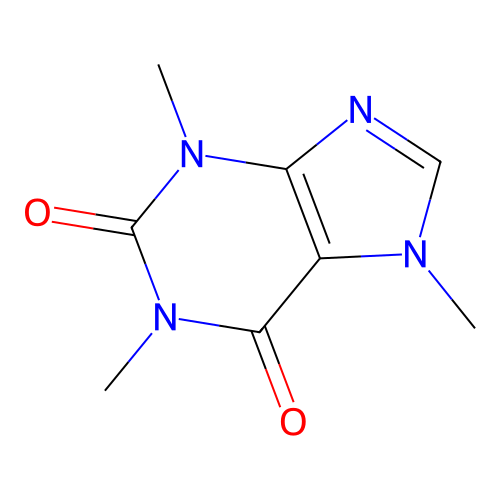

In [12]:
# Configure high-quality output
hq_output_config = OutputConfig(
    quality=100,        # Maximum quality
    dpi=300,           # High DPI for printing
    optimize=True,     # Optimize file size
    metadata={         # Add metadata
        "Title": "High Quality Molecular Rendering",
        "Author": "Jupyter Notebook Tutorial"
    }
)

# Render with high-quality settings
hq_caffeine = render_molecule(
    "CN1C=NC2=C1C(=O)N(C(=O)N2C)C",  # Caffeine
    output_format="png",
    output_config=hq_output_config,
    output_path="caffeine_hq.png"
)

print("✓ High-quality caffeine rendered")

# Check file size difference
import os
normal_size = os.path.getsize("caffeine.png")
hq_size = os.path.getsize("caffeine_hq.png")
print(f"Normal quality: {normal_size:,} bytes")
print(f"High quality: {hq_size:,} bytes")
print(f"Size increase: {(hq_size/normal_size-1)*100:.1f}%")

display(Image("caffeine_hq.png"))

## 4. Common Use Cases

### 4.1 Validating Molecular Strings

In [13]:
# Test validation with a mix of valid and invalid molecules
test_molecules = [
    "CCO",               # Valid: ethanol
    "INVALID_SMILES",    # Invalid SMILES
    "C1=CC=CC=C1",      # Valid: benzene  
    "CC(=O)O",          # Valid: acetic acid
    "XYZ123",           # Invalid
]

for mol in test_molecules:
    is_valid = validate_molecular_string(mol, "smiles")
    status = "✓ VALID" if is_valid else "✗ INVALID"
    print(f"  {status}: '{mol}'")

# Filter to only valid molecules
valid_molecules = [mol for mol in test_molecules if validate_molecular_string(mol, "smiles")]
print(f"\nFound {len(valid_molecules)} valid molecules out of {len(test_molecules)} tested")

  ✓ VALID: 'CCO'
  ✗ INVALID: 'INVALID_SMILES'
  ✓ VALID: 'C1=CC=CC=C1'
  ✓ VALID: 'CC(=O)O'
  ✗ INVALID: 'XYZ123'

Found 3 valid molecules out of 5 tested


[20:06:05] SMILES Parse Error: syntax error while parsing: INVALID_SMILES
[20:06:05] SMILES Parse Error: check for mistakes around position 3:
[20:06:05] INVALID_SMILES
[20:06:05] ~~^
[20:06:05] SMILES Parse Error: Failed parsing SMILES 'INVALID_SMILES' for input: 'INVALID_SMILES'
[20:06:05] SMILES Parse Error: syntax error while parsing: XYZ123
[20:06:05] SMILES Parse Error: check for mistakes around position 1:
[20:06:05] XYZ123
[20:06:05] ^
[20:06:05] SMILES Parse Error: Failed parsing SMILES 'XYZ123' for input: 'XYZ123'
[20:06:05] SMILES Parse Error: syntax error while parsing: INVALID_SMILES
[20:06:05] SMILES Parse Error: check for mistakes around position 3:
[20:06:05] INVALID_SMILES
[20:06:05] ~~^
[20:06:05] SMILES Parse Error: Failed parsing SMILES 'INVALID_SMILES' for input: 'INVALID_SMILES'
[20:06:05] SMILES Parse Error: syntax error while parsing: XYZ123
[20:06:05] SMILES Parse Error: check for mistakes around position 1:
[20:06:05] XYZ123
[20:06:05] ^
[20:06:05] SMILES Pars

### 4.2 Batch Processing with Error Handling

In [14]:
# Process multiple molecules with robust error handling
drug_molecules = {
    "Aspirin": "CC(=O)OC1=CC=CC=C1C(=O)O",
    "Ibuprofen": "CC(C)CC1=CC=C(C=C1)C(C)C(=O)O", 
    "Invalid Drug": "THIS_IS_NOT_A_SMILES",
    "Penicillin": "CC1([C@H](N2[C@H](S1)[C@@H](C2=O)NC(=O)CC3=CC=CC=C3)C(=O)O)C",
    "Morphine": "CN1CC[C@]23C4=C5C=CC(O)=C4O[C@H]2[C@@H](O)C=C[C@H]3[C@H]1C5"
}

successful_renders = []
failed_renders = []

print("Processing drug molecules...")

for name, smiles in drug_molecules.items():
    try:
        # First validate
        if not validate_molecular_string(smiles, "smiles"):
            print(f"  Skipping '{name}': Invalid SMILES")
            failed_renders.append((name, "Invalid SMILES"))
            continue
            
        # Render the molecule
        image = render_molecule(smiles, output_path=f"drug_{name.lower().replace(' ', '_')}.png")
        successful_renders.append(name)
        print(f"  ✓ Rendered {name}")
        
    except Exception as e:
        print(f"  ✗ Failed to render '{name}': {str(e)}")
        failed_renders.append((name, str(e)))

print("\nResults:")
print(f"  Successfully rendered: {len(successful_renders)}")
print(f"  Failed: {len(failed_renders)}")

if successful_renders:
    print(f"\nSuccessful molecules: {', '.join(successful_renders)}")
if failed_renders:
    print("\nFailed molecules:")
    for name, error in failed_renders:
        print(f"    • {name}: {error}")

Processing drug molecules...


INFO:molecular_string_renderer.outputs.base:Successfully saved PNG to 'drug_aspirin.png'
INFO:molecular_string_renderer.core:Successfully rendered SMILES to PNG


  ✓ Rendered Aspirin


INFO:molecular_string_renderer.outputs.base:Successfully saved PNG to 'drug_ibuprofen.png'
INFO:molecular_string_renderer.core:Successfully rendered SMILES to PNG
[20:06:06] SMILES Parse Error: syntax error while parsing: THIS_IS_NOT_A_SMILES
[20:06:06] SMILES Parse Error: check for mistakes around position 1:
[20:06:06] THIS_IS_NOT_A_SMILES
[20:06:06] ^
[20:06:06] SMILES Parse Error: Failed parsing SMILES 'THIS_IS_NOT_A_SMILES' for input: 'THIS_IS_NOT_A_SMILES'


  ✓ Rendered Ibuprofen
  Skipping 'Invalid Drug': Invalid SMILES


INFO:molecular_string_renderer.outputs.base:Successfully saved PNG to 'drug_penicillin.png'
INFO:molecular_string_renderer.core:Successfully rendered SMILES to PNG


  ✓ Rendered Penicillin


INFO:molecular_string_renderer.outputs.base:Successfully saved PNG to 'drug_morphine.png'
INFO:molecular_string_renderer.core:Successfully rendered SMILES to PNG


  ✓ Rendered Morphine

Results:
  Successfully rendered: 4
  Failed: 1

Successful molecules: Aspirin, Ibuprofen, Penicillin, Morphine

Failed molecules:
    • Invalid Drug: Invalid SMILES


### 4.3 Object-Oriented Interface

INFO:molecular_string_renderer.outputs.base:Successfully saved PNG to 'alcohol_0.png'
INFO:molecular_string_renderer.outputs.base:Successfully saved PNG to 'alcohol_1.png'


Using MolecularRenderer class:
  ✓ Rendered O → alcohol_0.png (size: (400, 300))
  ✓ Rendered CO → alcohol_1.png (size: (400, 300))


INFO:molecular_string_renderer.outputs.base:Successfully saved PNG to 'alcohol_2.png'
INFO:molecular_string_renderer.outputs.base:Successfully saved PNG to 'alcohol_3.png'


  ✓ Rendered CCO → alcohol_2.png (size: (400, 300))
  ✓ Rendered CCCO → alcohol_3.png (size: (400, 300))
All alcohols rendered with consistent styling!

Rendered molecules:

Molecule 1: O


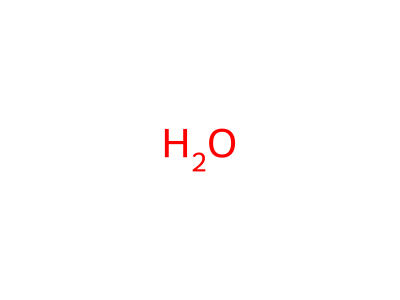


Molecule 2: CO


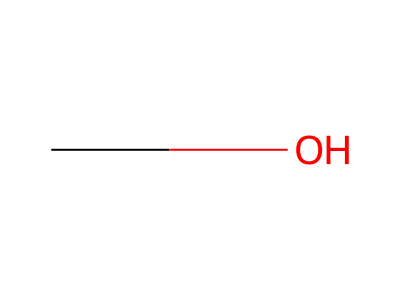


Molecule 3: CCO


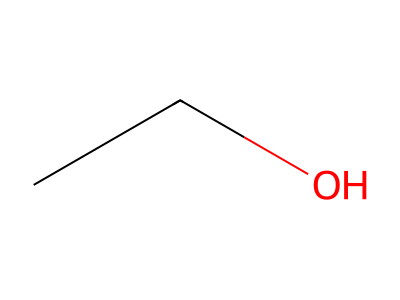


Molecule 4: CCCO


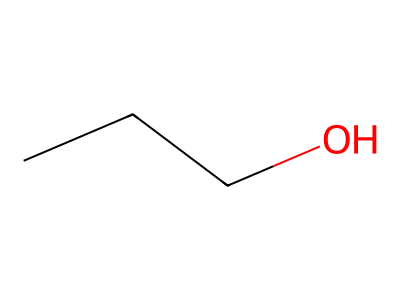

In [15]:
# Create a renderer instance for reuse
renderer = MolecularRenderer(
    render_config=RenderConfig(width=400, height=300, background_color="white")
)

# Use the same renderer for multiple molecules
simple_molecules = ["O", "CO", "CCO", "CCCO"]  # Water, methanol, ethanol, propanol

print("Using MolecularRenderer class:")
for i, smiles in enumerate(simple_molecules):
    filename = f"alcohol_{i}.png"
    image = renderer.render(smiles, output_path=filename)
    print(f"  ✓ Rendered {smiles} → {filename} (size: {image.size})")

print("All alcohols rendered with consistent styling!")

# Display the rendered molecules
print("\nRendered molecules:")
for i, smiles in enumerate(simple_molecules):
    print(f"\nMolecule {i+1}: {smiles}")
    display(Image(f"alcohol_{i}.png"))

## 5. Advanced Features

### 5.1 Working with Different Color Schemes

Rendering benzene with different color schemes:


INFO:molecular_string_renderer.outputs.base:Successfully saved PNG to 'benzene_white.png'
INFO:molecular_string_renderer.core:Successfully rendered SMILES to PNG


    Standard white background:


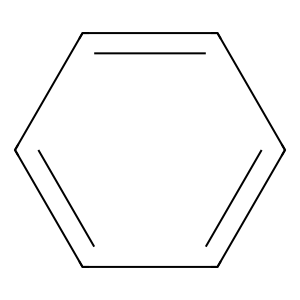

INFO:molecular_string_renderer.outputs.base:Successfully saved PNG to 'benzene_black.png'
INFO:molecular_string_renderer.core:Successfully rendered SMILES to PNG


    Dark theme:


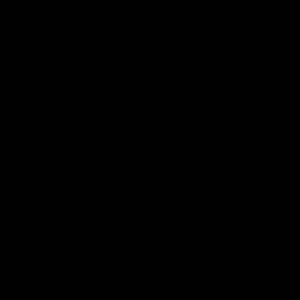

INFO:molecular_string_renderer.outputs.base:Successfully saved PNG to 'benzene_hex_f0f0f0.png'
INFO:molecular_string_renderer.core:Successfully rendered SMILES to PNG


    Light gray:


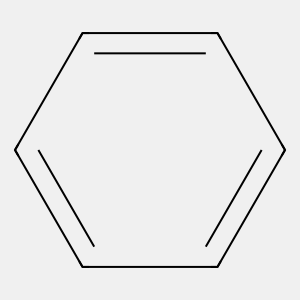

INFO:molecular_string_renderer.outputs.base:Successfully saved PNG to 'benzene_lightblue.png'
INFO:molecular_string_renderer.core:Successfully rendered SMILES to PNG


    Blue theme:


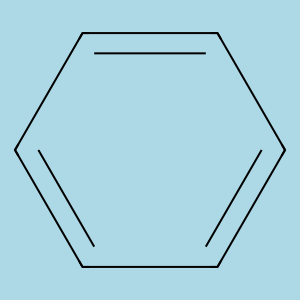

INFO:molecular_string_renderer.outputs.base:Successfully saved PNG to 'benzene_lightyellow.png'
INFO:molecular_string_renderer.core:Successfully rendered SMILES to PNG


    Yellow theme:


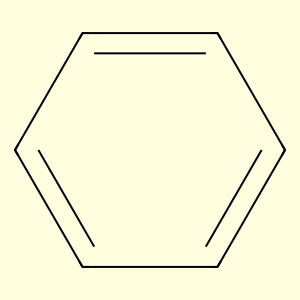

In [16]:
# Try different color schemes for the same molecule
benzene = "C1=CC=CC=C1"

color_schemes = [
    ("white", "Standard white background"),
    ("black", "Dark theme"),
    ("#f0f0f0", "Light gray"),
    ("lightblue", "Blue theme"),
    ("lightyellow", "Yellow theme")
]

print("Rendering benzene with different color schemes:")
for color, description in color_schemes:
    config = RenderConfig(
        width=300,
        height=300,
        background_color=color
    )
    
    filename = f"benzene_{color.replace('#', 'hex_')}.png"
    image = render_molecule(benzene, render_config=config, output_path=filename)
    
    # Display the image
    print(f"    {description}:")
    display(Image(filename))

### 5.2 Publication-Ready SVG Output

INFO:molecular_string_renderer.outputs.base:Successfully saved svg to 'caffeine_publication.svg'
INFO:molecular_string_renderer.core:Successfully rendered SMILES to SVG


✓ Publication-quality SVG created: caffeine_publication.svg
  This is a true vector graphic that will scale perfectly!


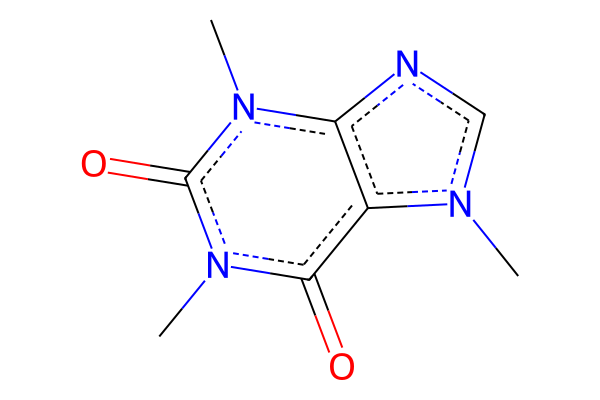

In [17]:
# Create publication-quality SVG output
publication_config = RenderConfig(
    width=600,
    height=400,
    background_color="white",
    show_hydrogen=False,
    show_carbon=False
)

svg_output_config = OutputConfig(
    svg_sanitize=True,           # Security
    svg_use_vector=True,         # True vector graphics
    svg_line_width_mult=1.2      # Slightly thicker lines
)

# Render a complex molecule as SVG
complex_molecule = "CN1C=NC2=C1C(=O)N(C(=O)N2C)C"  # Caffeine

svg_image = render_molecule(
    complex_molecule,
    format_type="smiles",
    output_format="svg", 
    render_config=publication_config,
    output_config=svg_output_config,
    output_path="caffeine_publication.svg"
)

print("✓ Publication-quality SVG created: caffeine_publication.svg")
print(f"  This is a true vector graphic that will scale perfectly!")

# SVGs can also be displayed in notebooks (though as raster when displayed)
from IPython.display import SVG
display(SVG("caffeine_publication.svg"))